[View in Colaboratory](https://colab.research.google.com/github/Manasa9391/Cognitive-Computing/blob/master/CNN_CIFAR10.ipynb)

The base code had an optimizer of RMSprop and the model is 59.7 percent accurate on testing. 

In [16]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


batch_size = 1024
num_classes = 10
epochs = 70
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'



# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" %
                     (i, loss[i], acc[i], val_loss[i], val_acc[i]))
            
            
        
        

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    history =model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores_t = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores_t[0])
print('Train accuracy:', scores_t[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
49/49 [==============================] - 33s 665ms/step - loss: 2.1557 - acc: 0.1959 - val_loss: 2.0118 - val_acc: 0.2809
Epoch 2/10
49/49 [==============================] - 31s 641ms/step - loss: 1.9676 - acc: 0.2823 - val_loss: 1.8430 - val_acc: 0.3538
Epoch 3/10
49/49 [==============================] - 31s 640ms/step - loss: 1.8673 - acc: 0.3246 - val_loss: 1.7608 - val_acc: 0.3780
Epoch 4/10
49/49 [==============================] - 32s 643ms/step - loss: 1.8123 - acc: 0.3471 - val_loss: 1.7067 - val_acc: 0.3897
Epoch 5/10
49/49 [==============================] - 31s 642ms/step - loss: 1.7762 - acc: 0.3577 - val_loss: 1.6715 - val_acc: 0.4059
Epoch 6/10
49/49 [==============================] - 32s 645ms/step - loss: 1.7476 - acc: 0.3696 - val_loss: 1.6543 - val_acc: 0.4100
Epoch 7/10
49/49 [==============================] - 32s 645ms/step - loss: 1.7197 - acc: 0.375

In [0]:
#model.save("C:\\Users\\Manasa\\Desktop\\Srikanth Assignment\\cifar.h5")

model.save('model.h5')

from google.colab import files
files.download("model.h5")

In [0]:
model.save_weights('C:\\Users\\Manasa\Desktop\\Srikanth Assignment')

In [52]:
import random
import numpy as np
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c
  
right = 0
mistake = 0
for i in range(11):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    ret = model.predict(data, batch_size=1) 
    print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum > ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = list(y_test[index]).index(1)
    if i == bestclass:
      right += 1
    else:
      mistake += 1
                                                                   

print(y_test[index])

[[0.06742913 0.04840138 0.16081674 0.10377883 0.17389461 0.09219659
  0.16125782 0.09382654 0.0481891  0.05020925]]


ValueError: ignored

In [0]:
# Changing the Optimizer to Adam

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 1024
num_classes = 10
epochs = 80
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
opt = keras.optimizers.adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores_train = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

Using TensorFlow backend.


170500096/170498071 [==============================] - 25s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/70
49/49 [==============================] - 38s 767ms/step - loss: 2.0196 - acc: 0.2541 - val_loss: 1.7184 - val_acc: 0.3890
Epoch 2/70
49/49 [==============================] - 34s 699ms/step - loss: 1.6794 - acc: 0.3903 - val_loss: 1.4401 - val_acc: 0.4771
Epoch 3/70
49/49 [==============================] - 35s 705ms/step - loss: 1.5196 - acc: 0.4467 - val_loss: 1.3223 - val_acc: 0.5195
Epoch 4/70
49/49 [==============================] - 35s 713ms/step - loss: 1.4283 - acc: 0.4852 - val_loss: 1.2567 - val_acc: 0.5462
Epoch 5/70
49/49 [==============================] - 35s 709ms/step - loss: 1.3495 - acc: 0.5147 - val_loss: 1.2142 - val_acc: 0.5615
Epoch 6/70
49/49 [==============================] - 35s 714ms/step - loss: 1.2968 - acc: 0.5338 - val_loss: 1.1840 - val_acc: 0.5820
Epoch 7/70
49/49 [========

In [23]:
import random
import numpy as np
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c
  
right = 0
mistake = 0
for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = list(y_test[index]).index(1)
    if i == bestclass:
      right += 1
    else:
      mistake += 1
                                                                   

print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 16
The number of mistake: 84
A correct answer rate: 16.0 %


In [1]:
prn=model.predict(x_test)
prn

NameError: ignored

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 1024
num_classes = 10
epochs = 80
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
opt = keras.optimizers.SGD(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/50
49/49 [==============================] - 35s 720ms/step - loss: 2.3103 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.0875
Epoch 2/50
49/49 [==============================] - 34s 700ms/step - loss: 2.3090 - acc: 0.0983 - val_loss: 2.3025 - val_acc: 0.0887
Epoch 3/50
49/49 [==============================] - 35s 705ms/step - loss: 2.3083 - acc: 0.0996 - val_loss: 2.3025 - val_acc: 0.0884
Epoch 4/50
49/49 [==============================] - 34s 702ms/step - loss: 2.3097 - acc: 0.0999 - val_loss: 2.3024 - val_acc: 0.0885
Epoch 5/50
49/49 [==============================] - 34s 702ms/step - loss: 2.3080 - acc: 0.1003 - val_loss: 2.3023 - val_acc: 0.0893
Epoch 6/50
49/49 [==============================] - 34s 700ms/step - loss: 2.3083 - acc: 0.0996 - val_loss: 2.3022 - val_acc: 0.0895
Epoch 7/50
49/49 [==============================] - 34s 698ms/step - loss: 2.3078 - acc: 0.103

In [8]:

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


batch_size = 1024
num_classes = 10
epochs = 80
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.adagrad(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history =model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores_train = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/50
49/49 [==============================] - 36s 725ms/step - loss: 2.0747 - acc: 0.2369 - val_loss: 1.8504 - val_acc: 0.3494
Epoch 2/50
49/49 [==============================] - 35s 704ms/step - loss: 1.8519 - acc: 0.3279 - val_loss: 1.7297 - val_acc: 0.3876
Epoch 3/50
49/49 [==============================] - 34s 693ms/step - loss: 1.7832 - acc: 0.3554 - val_loss: 1.6807 - val_acc: 0.3983
Epoch 4/50
49/49 [==============================] - 34s 693ms/step - loss: 1.7411 - acc: 0.3664 - val_loss: 1.6388 - val_acc: 0.4145
Epoch 5/50
49/49 [==============================] - 35s 705ms/step - loss: 1.7050 - acc: 0.3797 - val_loss: 1.6460 - val_acc: 0.4091
Epoch 6/50
49/49 [==============================] - 35s 706ms/step - loss: 1.6809 - acc: 0.3873 - val_loss: 1.6281 - val_acc: 0.4182
Epoch 7/50
49/49 [==============================] - 34s 703ms/step - loss: 1.6575 - acc: 0.393

In [21]:
import random
import numpy as np
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c
  
right = 0
mistake = 0
for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = list(y_test[index]).index(1)
    if i == bestclass:
      right += 1
    else:
      mistake += 1
                                                                   

print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 7
The number of mistake: 93
A correct answer rate: 7.000000000000001 %


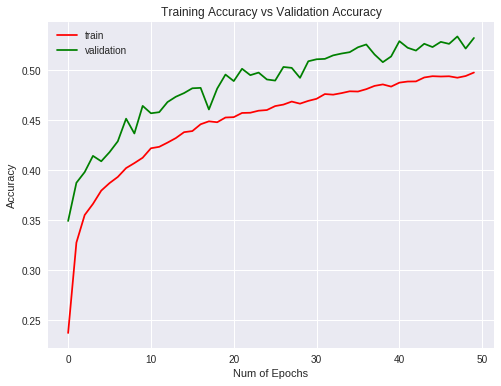

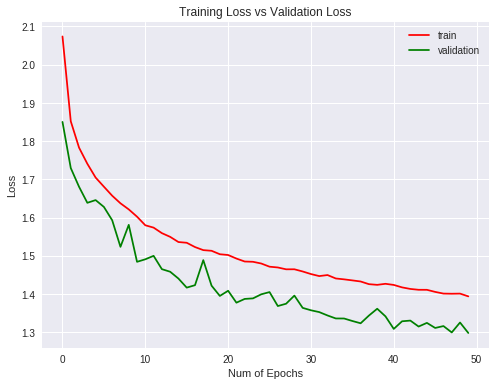

In [17]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
#plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
#plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

In [20]:
import random
import numpy as np
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c
  
right = 0
mistake = 0
for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = list(y_test[index]).index(1)
    if i == bestclass:
      right += 1
    else:
      mistake += 1
                                                                   

print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 9
The number of mistake: 91
A correct answer rate: 9.0 %
